In [1]:
from time import time
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import ctypes
%matplotlib inline  

# Homework 2

### 1. Implement the class `Stacks` and all its methods using singly linked lists. Analyze the runtime and memory complexity, and compare with what we studied in class

In [2]:
class Node:
    """
    Implementation of a node
    """
    def __init__(self, val=None):
        self.val = val
        self.next_node = None
    
    def set_next_node(self, next_node):
        self.next_node = next_node
        
class Singly_linked_list:
    """
    Implementation of a singly linked list
    """
    def __init__(self, head_node=None):
        """
        Head Node initialization
        Preset: head_node = None
        """

        self.head_node = head_node

    def list_traversed(self):
        """
        List Traversed
        Print all the sigle linked list
        """
        node = self.head_node
        while node:
            print(node.val)
            node = node.next_node
    
    def insert_head(self, new_node):
        """
        Insert Head
        Inserts a node in the first place of the list
        """
        # insert to the head
        # A -> B -> null
        # R -> A -> B -> null 
        new_node.set_next_node(self.head_node)
        self.head_node = new_node
        
    def insert_tail(self, new_node):
        """
        Insert Tail
        Inserts a node at the end of the list where the node.next_node = None.
        """
        # insert to the tail
        # A -> B -> null
        # A -> B -> R -> null 
        node = self.head_node
        prev = self.head_node
        while node:
            prev = node
            node = node.next_node
        prev.set_next_node(new_node)
        
    def insert_middle(self, new_node, value):
        """
        Insert Middle
        Inserts a node at next node of a specific value at the list.
        If not found -> insert_tail()
        """
        # insert in the middle
        # A -> B -> C -> null
        # A -> B -> R -> C -> null
        node = self.head_node
        #Changed case not val found
        while node:
            if node.val == value :  #Prevents None has no attribute 'val'
                break
            node = node.next_node
        if node:
            new_node.set_next_node(node.next_node)
            node.set_next_node(new_node)
        else:
            self.insert_tail(new_node)

    def delete_head(self):
        """
        Delete head
        Deletes first node of the list.
        If None -> pass
        """
        #delete value
        # A -> B -> C -> None
        # B -> C -> None
        node = self.head_node
        self.head_node = node.next_node
        node.next_node = None

    def delete_tail(self):
        """
        Delete tail
        Deletes last node of the list.
        """
        #delete value
        # A -> B -> C -> None
        # A -> B -> None
        node = self.head_node
        prev = self.head_node
        while node.next_node:
            prev = node
            node = node.next_node
        prev.set_next_node(None)


    def delete(self,value):
        """
        Delete
        Deletes a node at a specific value of the list.
        If not found -> pass
        If firts -> Changes the head node
        """
        #delete value
        # A -> B -> C -> None
        # A -> C -> None
        node = self.head_node
        prev = None
        while node:
            if node.val == value :
                break
            prev = node
            node = node.next_node
        if node:
            if not prev:    #Prevent head node error. None has no attribute 'set_next_node'
                self.head_node = node.next_node
                node.next_node = None
            else:
                prev.set_next_node(node.next_node)
                node.next_node = None


In [3]:
class Stack:
    """
    Implementation of the stack data structure using single linked list
    """
    def __init__(self, n):
        """
        Initialization of Stack
        Input: Size of Stack
        """
        self.stack = Singly_linked_list(Node(None))
        self.n = n      
        self.l = 0
    
    def push(self, item):
        """
        Push
        Adds data to the top of the Stack.
        Input: Item 
        """
        if self.l != self.n :
            self.stack.insert_head(Node(item))
            self.l += 1
        else:
            raise ValueError("No more capacity")

    def pop(self):
        """
        Pop
        Deletes the top of the Stack
        """
        if self.l > 0:
            temp = self.stack.head_node.val
            self.stack.delete_head()
            self.l -= 1   
            return temp 

    def top(self):
        """
        Top
        Returns the top of the Stack
        """
        return self.stack.head_node.val

    def full(self):
        """
        Full
        Returns if the Stack is full. return self.l == self.n
        """
        return self.l == self.n
    
    def empty(self):
        """
        Empty
        Returns if the Stack is empty. If self.l == 0, return true
        """
        return self.l == 0
    
    def size(self):
        """
        Size
        Returns the size of the Stack. return self.l
        """
        return self.l

In [4]:
S = Stack(10)

S.push(1)
S.push(2)
S.push(4)
S.push(-1)

In [5]:
S.top()

-1

In [6]:
S.size()

4

In [7]:
S.pop()

-1

In [8]:
S.full()

False

In [9]:
S.empty()

False

La complejidad de la clase stack se analiza a continuación:
* Push: 
    * Tiene complejidad en runtime $O(1)$ porque el método insert_head() de la clase singly linked list tiene una complejidad constante sin ningun lazo.
    * Tiene complejidad en memoria $O(1)$ porque usa valor constante en memoria y no por aumentar el tamaño del stack, la memoria aumenta.
* Pop: 
    * $O(1)$ porque el método delete_head() de la clase single 
    linked list tiene una complejidad constante sin ningun lazo.
    * Tiene complejidad en memoria $O(1)$ porque delete_head usa valor constante en memoria y no por aumentar el tamaño del stack, la memoria aumenta.
* Top:
    * $O(1)$ porque solo imprime el valor del primer nodo de la lista y eso no depende del tamaño de la misma. Complejidad constante.
    * Tiene complejidad en memoria $O(1)$ porque la funcion solo lee una variable y no por aumentar el tamaño del stack, la memoria aumenta.
* Full: 
    * $O(1)$ porque solo compara si self.l == self.n para que el stack esté lleno.
    * Tiene complejidad en memoria $O(1)$ porque la funcion solo lee y compara dos variable y no por aumentar el tamaño del stack, la memoria aumenta.
* Empty: 
    * $O(1)$ porque solo compara si self.l = 0
    * Tiene complejidad en memoria $O(1)$ porque la funcion solo lee y compara dos variable y no por aumentar el tamaño del stack, la memoria aumenta.
* Size: 
    * $O(1)$ porque solo imprime el valor de self.l
    * Tiene complejidad en memoria $O(1)$ porque la funcion solo retorna una variable y no por aumentar el tamaño del stack, la memoria aumenta.

Comparado con la implementación realizada en clase, se puede notar que usar singly_linked_list es igual de eficiente que al usar arreglos. Ya que en todos los casos la complejidad de las funciones de stack es $O(1)$

### 2. Write a method part of the linked list class that will reverse the linked list. Your implementation should visit each node in the list only one time, and should use $O(1)$ of extra memory.


> For example, if the list is:

> A -> B -> C -> D -> null

> The method must return:

> D -> C -> B -> A -> null


In [10]:
class Singly_linked_list(Singly_linked_list):
    def reverse(self):
        """
        Reverse
        Function that changes the way of the linked list starting from the bottom and ending at the start. 
        A -> B -> C -> None
        reverse() = C -> B -> A -> None
        """
        prev = self.head_node
        node =self.head_node.next_node
        prev.set_next_node(None)
        ref_next_node = None
        while node:
            ref_next_node = node.next_node
            node.set_next_node(prev)
            prev = node
            node = ref_next_node
        self.head_node = prev
        

In [11]:
N1 = Node("A")
N2 = Node("B")
N3 = Node("C")
N4 = Node("D")
N1.set_next_node(N2)
N2.set_next_node(N3)
N3.set_next_node(N4)

L1 = Singly_linked_list(N1)

L1.list_traversed()
print("")
L1.reverse()
L1.list_traversed()


A
B
C
D

D
C
B
A


### 3. Implement the class Queue using stacks. 

> a. Analyze the runtime and memory complexity, and compare with what we implemented in class.

> b. Implement a few test cases that would allow you to measure the difference in runtime of the `dequeue` method. (Hint: what is the worst case, so that dequeue of the stack implementation is greater than the implementation we did in class?)

In [12]:
class Queue():
    def __init__(self,n):
        self.l = 0
        self.n = n
        self.enqueue_stk = Stack(n)
        self.dequeue_stk = Stack(n)

    def enqueue(self,item):
        if self.l == self.n:
            raise ValueError("No more capacity")
        self.enqueue_stk.push(item)
        self.l += 1

    def dequeue(self): 
        if self.dequeue_stk.empty() and self.l > 0:
            while not self.enqueue_stk.empty():
                self.dequeue_stk.push(self.enqueue_stk.pop())
            self.l -= 1
            return self.dequeue_stk.pop()
        elif self.l > 0:
            self.l -= 1
            return self.dequeue_stk.pop()

    def first(self):
        if self.dequeue_stk.empty():
            return self.enqueue_stk.top()
        else:
            return self.dequeue_stk.top()
    
    def full(self):
        return self.l == self.n
    
    def empty(self):
        return self.l == 0
    
    def size(self):
        return self.l

In [13]:
q = Queue(10)
q.enqueue(1)
q.enqueue(2)
q.enqueue(3)

In [14]:
q.dequeue()


1

La complejidad de la clase Queue se analiza a continuación:
* Enqueue: 
    * Tiene complejidad en runtime $O(1)$ porque el método push() de la clase stack tiene complejidad $O(1)$.
    * Tiene complejidad en memoria $O(1)$ porque usa valor constante en memoria igual a los $n$ datos admitidos, más variables adicionales. La memoria no aumenta durante la ejecución.
* Dequeue: 
    * $O(1)$ cuando el stack de dequeue no está vacío. En el caso de que esté vacío, el método dequeue pasa todos los datos del stack enqueue hacia dequeue lo cual tiene una complejidad $O(n)$. La complejidad del dequeue está amortizada.
    * Tiene complejidad en memoria $O(1)$ porque al ingresar nuevos datos con enqueue, la memoria utilizada no aumenta. 
* First:
    * $O(1)$ porque solo imprime el valor top() de enqueue o dequeue según el caso en el que estemos. Este método tiene complejidad constante.
    * Tiene complejidad en memoria $O(1)$ porque la funcion solo lee una variable y no por aumentar el tamaño del queue, la memoria aumenta.
* Full: 
    * $O(1)$ porque solo compara si self.l == self.n para que la queue esté lleno.
    * Tiene complejidad en memoria $O(1)$ porque la funcion solo lee y compara dos variable y no por aumentar el tamaño de la queue, la memoria aumenta.
* Empty: 
    * $O(1)$ porque solo compara si self.l = 0
    * Tiene complejidad en memoria $O(1)$ porque la funcion solo lee y compara dos variable y no por aumentar el tamaño de la queue, la memoria aumenta.
* Size: 
    * $O(1)$ porque solo imprime el valor de self.l
    * Tiene complejidad en memoria $O(1)$ porque la funcion solo retorna una variable y no por aumentar el tamaño de la queue, la memoria aumenta.

Comparando con la implementación de Queue hecha en clase, se puede identificar cambios en el método Dequeue ya que para el caso realizado en clase, este método siempre tiene complejidad $O(n)$. Mientras que en esta segunda implementación, la mayor parte del tiempo, el método dequeue tiene complejidad $O(1)$ y solo en ciertos casos (cuando el stack dequeue esté vació) la complejidad es $O(1)$

* B)

In [15]:
#Decorador para calcular el tiempo de ejecucion de una funcion

from time import sleep

def calculo_tiempo(funcion):
    """
        En este decorador se crea un arreglo de dos dimensiones,
        la primera con el resultado de la funcion y el segundo
        con el tiempo de ejecucion de la misma.
    """

    #Se usa el sleep de 1s porque sino el resultado que devuelve es 0 por algun proceso interno de la computadora.
    def wrapper(*args, **kwargs):
        result = [0,0]    #Declaramos el arreglo
        start = 10**6*time()    #Se toma el tiempo inicial
        sleep(1)    #Espera de 1s
        result[0] = funcion(*args, **kwargs)    #Se ejecuta la función
        result[1] = 10**6*time() - start - 10**6    #Se toma la diferencia de tiempos menos 1s
        return result  
    return wrapper

In [16]:
class Queue(Queue):

    @calculo_tiempo
    def dequeue(self):
        if self.dequeue_stk.empty() and self.l > 0:
            while not self.enqueue_stk.empty():
                self.dequeue_stk.push(self.enqueue_stk.pop())
            self.l -= 1
            return self.dequeue_stk.pop()
        elif self.l > 0:
            self.l -= 1
            return self.dequeue_stk.pop()


In [17]:
n = np.array([1,10,10**2,10**3,10**4,10**5,10**6,10**7])
T1 = np.empty(len(n))   #Dequeue O(n)
T2 = np.empty(len(n))   #Dequeue O(1)

for j in range(0,len(n)):
    Q = Queue(n[j])
    for i in range(1,n[j]):
        Q.enqueue(i)
    T1[j] = Q.dequeue()[1]  #Dequeue O(n)
    T2[j] = Q.dequeue()[1]  #Dequeue O(1)

print("Dequeue runtime when dequeue_stk is empty")
print (T1)
print("")
print("Dequeue runtime when dequeue_stk is not empty")
print (T2)

Dequeue runtime when dequeue_stk is empty
[1.40100000e+03 7.04875000e+03 1.46935000e+04 4.63050000e+03
 1.57095000e+04 1.37588500e+05 1.33411425e+06 1.29659512e+07]

Dequeue runtime when dequeue_stk is not empty
[11429.25    25.5  10625.    3654.5   5934.5   1049.25  2471.    7596.5 ]


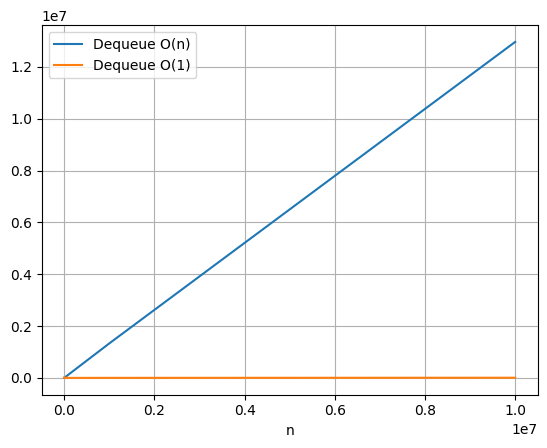

In [18]:
plot1 = pd.DataFrame()
plot1['Dequeue O(n)'] = T1
plot1['Dequeue O(1)'] = T2
plot1['n'] = n

#Plot
plot1.plot(x='n', y= ['Dequeue O(n)','Dequeue O(1)'])
plt.grid()

Como se puede observar, la linea de tendencia de dequeue cuando el dequeue_stk está vacío es lineal como se predijo anteriormente, ya que se está pasando $n$ datos de un stack a otro, lo cual tiene complejidad $O(n)$. Por otro lado, cuando dequeue_stk no está vacío, el algoritmo tiene una complejidad $O(1)$ constante hasta que este stack vuelva a estar vacío. Por esto se considera que el método dequeue en este tipo de implementación está amortizado.

### 4. Complete the PriorityQueue class, so that when we call `dequeue`, the element with the highest priority will be returned. Analyze the complexity of runtime and memory of the `enqueue` and `dequeue` methods.

Hint: use insertion sort , or find the minimum for each dequeue 

unsorted

Q = [(9,2), (1,5), (8,4)]

sorted - O(n^2)

Q = [(1,5), (8,4), (9,2)]

insert((2,3)) - O(n^2)

Q = [(1,5), (2,3), (8,4), (9,2)]

In [19]:
def insertion_sort(queue,length):
    """
    Insert Sort
    Input: Array of Tuples, length
    Output: Order the Array in order of priority
    """
    for j in range(1,length):
        temp = queue[j] 
        i = j-1
        while i >= 0 and queue[i][0] > temp[0]:
            queue[i+1] = queue[i]
            i -= 1
        queue[i+1] = temp

In [20]:
class PriorityQueue(object):
    """
    Implementation of the queue data structure
    """
    def __init__(self, n):
        self.l = 0
        self.n = n
        self.queue = self._create_queue(self.n)        
    
    def _create_queue(self, n):
        """
        Creates a new stack of capacity n
        """
        return (n * ctypes.py_object)()
    
    def insert(self, item):
        """
        Add new item to the queue
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        self.queue[self.l] = item
        self.l += 1

    def deleteMin(self):
        """
        Dequeue
        Deletes the first priority object in the queue.
        """
        if self.l > 0 :
            insertion_sort(self.queue,self.l)
            temp = self.queue[0]
            for i in range(1,self.l):
                self.queue[i-1] = self.queue[i]
            self.queue[self.l -1] = ctypes.py_object
            self.l -= 1
            return temp
        
    def getMin(self):
        """
        GetMin
        Returns the highest priority value
        """
        if self.l > 0 :
            insertion_sort(self.queue,self.l)
            return self.queue[0]
        
    def decreaseKey(self,item):
        """
        DecreaseKey
        Modifies element (k1,v) with (k2,v) if k1 > k2
        """
        i = 0
        temp = ""
        while self.queue[i][1] != item[1] and i < self.l:
            i += 1
        if self.queue[i][1] == item[1]:
            if self.queue[i][0] > item[0]:
                temp = str(self.queue[i]) + " -> " + str(item)
                self.queue[i] = item
            print(temp)

In [21]:
Q = PriorityQueue(5)
Q.insert((9,2))
Q.insert((1,5))
Q.insert((8,4))


In [22]:
Q.deleteMin()

(1, 5)

In [23]:
Q.getMin()

(8, 4)

In [24]:
Q.decreaseKey((2,2))

(9, 2) -> (2, 2)


La complejidad de la clase PriorityQueue se analiza a continuación:
* Insert: 
    * $O(1)$ porque solo se añade la tupla en el siguiente espacio de memoria disponible.
    * Tiene complejidad en memoria $O(1)$ porque usa valor constante en memoria indicados al inicializar la PriorityQueue. La memoria no aumenta durante la ejecución.
* DeleteMin: 
    * $O(n^2)$ ya que el método insert_sort tiene complejidad $O(n^2)$ y es siempre necesario para ordenar el arreglo conforme su prioridad.
    * Tiene complejidad en memoria $O(1)$ porque el método DeleteMin no modifica la memoria utilizada . 

### 5. A given linked-list (singly or doubly) represents an integer number. For example, 345 is represented by the singly-linked list 3 -> 4 ->5. Write a Python program that does the following:

1. Receives three integers A, B and C as inputs. Assume that the three number have the same number of digits.

2. Transform the numbers to their corresponding linked lists

3. Implement the sum of the three numbers. The result A + B + C must be stored in a linked list. 

4. Print the result by traversing the list. 

5. Run your program for numbers with 1 to 100 digits, and capture the runtime. Use these number to estimate the complexity of the runtime.
    - Hint: write a small function that uses `randint()` to generate a number of a given number of digits 
6. Analitically estimate the runtime complexity and compare with the one obtained in (5).

In [25]:
class Node:
    """
    Implementation of a node
    """
    def __init__(self, val=None):
        self.val = val
        self.next_node = None
        self.prev_node = None
        
class Doubly_linked_list:
    """
    Implementation of a singly linked list
    """
    def __init__(self, head_node=None):
        self.head_node = head_node

    def list_traverse(self):
        node = self.head_node
        while node:
            print (node.val)
            node = node.next_node


    def insert_at_start(self, data):
        """
        Insert a node at the start of the list
        """    
        if self.head_node is None:
            new_node = Node(data)
            self.head_node = new_node
            return
        new_node = Node(data)
        new_node.next_node = self.head_node
        self.head_node.prev_node = new_node
        self.head_node = new_node  

    def insert_at_end(self, data):
        """
        Insert a node at the end of the list
        """    
        if self.head_node is None:
            new_node = Node(data)
            self.head_node = new_node
            return
        node = self.head_node
        while node.next_node:
            node = node.next_node
        new_node = Node(data)
        new_node.prev_node = node
        node.next_node = new_node

    def insert_after_node(self, value, data):
        """
        Insert a node after a given node
        """        
        if self.head_node is None:
            new_node = Node(data)
            self.head_node = new_node
            return
        n = self.head_node
        while n.next_node:
            if n.val == value:
                break
            n = n.next_node
        if not n:
            raise ValueError("node not found")

        new_node = Node(data)
        new_node.next_node = n.next_node
        n.next_node.prev_node = new_node
        n.next_node = new_node
        new_node.prev_node = n
        
    def insert_before_node(self, value, data):
        """
        Insert a node before a given node
        """        
        if self.head_node is None:
            new_node = Node(data)
            self.head_node = new_node
            return
        n = self.head_node
        while n.next_node:
            if n.val == value:
                break
            n = n.next_node
        if not n:
            raise ValueError("node not found")

        new_node = Node(data)
        new_node.prev_node = n.prev_node
        n.prev_node = new_node
        new_node.next_node = n
        new_node.prev_node.next_node = new_node

In [26]:
def to_linked_list(num):
    A= Doubly_linked_list()
    while num > 0:
        temp = num % 10
        A.insert_at_start(temp)
        num = num // 10
    return A
    

In [184]:
def sum_3(A,B,C):
    
    A_list = to_linked_list(A)
    B_list = to_linked_list(B)
    C_list = to_linked_list(C)
    res = Doubly_linked_list()
    temp = 0
    nodes = [A_list.head_node,B_list.head_node,C_list.head_node]
    for i in range(3):
        while nodes[i].next_node:
            nodes[i] = nodes[i].next_node
        temp = temp + nodes[i].val  
    res.insert_at_start(temp % 10)
    temp = temp // 10 
    
    while nodes[0].prev_node:   #Assuming all numbers with same digits
        for i in range(3):
            nodes[i] = nodes[i].prev_node
            temp = temp + nodes[i].val       
        res.insert_at_start(temp % 10)
        temp = temp // 10 
    while temp > 0:
        res.insert_at_start(temp % 10)
        temp = temp // 10
    return res 


In [185]:
Suma = sum_3(12345,43212,45378)
Suma.list_traverse()

1
0
0
9
3
5


In [186]:
@calculo_tiempo
def sum_3(A,B,C):
   
    A_list = to_linked_list(A)
    B_list = to_linked_list(B)
    C_list = to_linked_list(C)

    res = Doubly_linked_list()
    temp = 0
    nodes = [A_list.head_node,B_list.head_node,C_list.head_node]
    for i in range(3):
        while nodes[i].next_node:
            nodes[i] = nodes[i].next_node
        temp = temp + nodes[i].val  
    res.insert_at_start(temp % 10)
    temp = temp // 10 
    
    while nodes[0].prev_node:   #Assuming all numbers with same digits
        for i in range(3):
            nodes[i] = nodes[i].prev_node
            temp = temp + nodes[i].val       
        res.insert_at_start(temp % 10)
        temp = temp // 10 
    while temp > 0:
        res.insert_at_start(temp % 10)
        temp = temp // 10
    return res 


In [195]:
import random

digits = 100
T1 = np.empty(digits)
n = np.empty(digits)
for i in range(1,digits):
    n[i] = i
    T1[i] = sum_3(random.randint(10**i,10**(i+1))//10,random.randint(10**i,10**(i+1))//10,random.randint(10**i,10**(i+1))//10)[1]
    


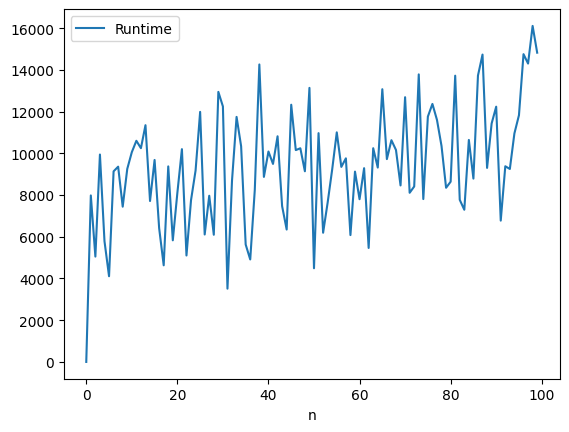

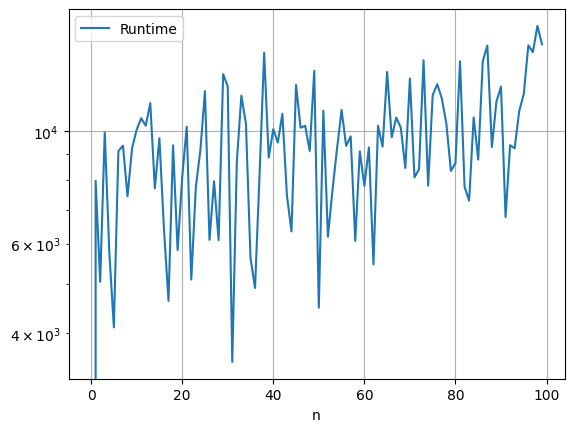

In [200]:
plot2 = pd.DataFrame()
plot2['Runtime'] = T1
plot2['n'] = n

#Plot
plot2.plot(x='n', y= ['Runtime'])
plot2.plot(x='n', y= ['Runtime'], logy=True)
plt.grid()

La gráfica nos indica que el algoritmo se estabiliza aproximadamente en 9000[us] lo cual nos indica que existe una tendencia logarítmica. La gráfica se encuentra muy errática, por que no se puede distinguir la función que describe este algoritmo. La diferencia principal en el tiempo de ejeción es  debido a los procesos internos que la computadora realiza y su capacidad de frecuencia para cada cálculo. La complejidad estimada es 

$$O(n) = log_{10} (n)$$

6. Para la parte analítica, la clase to_linked_list tiene complejidad:
$$O(n) = log_{10} (n)$$
Los for loop y while presentes corresponden a una complejidad:
$$O(n) = n$$
Finalmente, el último while tiene complejidad $$O(n) = log_{10} (n)$$

Por lo tanto, se obtiene una complejidad de : $$O(n) = 3n + 3log_{10} (n)$$

Como se puede observar, la pecularidad de tendencia del literal 5) es bastante visible. Sin embargo, la función $n$ que crece más rápido que la logarítmica. 